In [1]:
#inspect_pdm.ipynb
#
#Copyright (c) 2019, Joe Hahn
#
#by Joe Hahn
#joe.hahn@oracle.com
#17 September 2018
#
#inspect pdm output and compare to rtf simulation

In [2]:
#import python & helper_fns used below
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)    #tell pandas to display all columns

In [3]:
#import plotting libraries
#use following line when in Jupyter
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
sns.set(font_scale=1.5, font='DejaVu Sans')

In [4]:
#read input parameters
inputs_path = 'inputs_pdm.py'
execfile(inputs_path)
print 'inputs_path = ', inputs_path
print 'debug = ', debug
print 'N_devices = ', N_devices
print 'sensor_sigma = ', sensor_sigma
print 'N_timesteps = ', N_timesteps
print 'time_start = ', time_start
print 'output_interval = ', output_interval
print 'strategy = ', strategy
print 'pdm_threshold_time = ', pdm_threshold_time
print 'pdm_threshold_probability = ', pdm_threshold_probability
print 'pdm_skip_time = ', pdm_skip_time
print 'N_technicians = ', N_technicians
print 'repair_duration = ', repair_duration
print 'maintenance_duration = ', maintenance_duration
print 'rn_seed = ', rn_seed
print 'issues = ', issues

inputs_path =  inputs_pdm.py
debug =  True
N_devices =  1000
sensor_sigma =  0.01
N_timesteps =  20000
time_start =  0
output_interval =  10
strategy =  pdm
pdm_threshold_time =  400
pdm_threshold_probability =  0.5
pdm_skip_time =  5
N_technicians =  100
repair_duration =  100
maintenance_duration =  25
rn_seed =  18
issues =  {'cracked_valve': {'coefficient': 1e-05, 'fatal': True, 'ID': 2}, 'broken_gear': {'coefficient': 2e-06, 'fatal': True, 'ID': 3}, 'jammed_rotor': {'coefficient': 8e-05, 'fatal': True, 'ID': 1}, 'crud': {'coefficient': 0.1, 'fatal': False, 'ID': 0}}


In [5]:
#get telemetry data, repairs data, and records=telemetry.join.repairs
time_bucket_size = 20
telemetry_file = 'data/telemetry_pdm.csv.gz'
repairs_file = 'data/repairs_pdm.csv.gz'
from helper_fns import * 
telemetry, repairs, records = prep_rtf_data(time_bucket_size, issues, telemetry_file, repairs_file)
print records.dtypes
print 'telemetry.shape = ', telemetry.shape
print 'repairs.shape = ', repairs.shape
print 'records.shape = ', records.shape
records.head()

reading data/telemetry_pdm.csv.gz ...
pivoting telemetry...
reading data/repairs_pdm.csv.gz ...
merging telemetry and repairs...
issue_names =  ['cracked_valve', 'broken_gear', 'jammed_rotor']
computing time to next issue...
computing time since previous issue...
deviceID                      int64
time_bucket                   int64
time                          int64
load                        float64
pressure                    float64
temperature                 float64
production_rate             float64
technicianID                  int64
issue                        object
production_rate_fail        float64
temperature_fail            float64
pressure_fail               float64
load_fail                   float64
time_til_cracked_valve       object
time_til_broken_gear         object
time_til_jammed_rotor        object
time_since_cracked_valve     object
time_since_broken_gear       object
time_since_jammed_rotor      object
dtype: object
telemetry.shape =  (11008614, 5)
repai

,deviceID,time_bucket,time,load,pressure,temperature,production_rate,technicianID,issue,production_rate_fail,temperature_fail,pressure_fail,load_fail,time_til_cracked_valve,time_til_broken_gear,time_til_jammed_rotor,time_since_cracked_valve,time_since_broken_gear,time_since_jammed_rotor
0,0,0,0,0.035425,-0.035538,0.007515,0.994249,-1,none,NaN,NaN,NaN,NaN,6980,7600,3040,NaN,NaN,NaN
1,0,1,20,0.028371,-0.081086,-0.053502,0.989993,-1,none,NaN,NaN,NaN,NaN,6960,7580,3020,NaN,NaN,NaN
2,0,2,40,-0.044407,-0.029412,-0.023016,0.993412,-1,none,NaN,NaN,NaN,NaN,6940,7560,3000,NaN,NaN,NaN
3,0,3,60,-0.029861,-0.027558,-0.013868,0.995588,-1,none,NaN,NaN,NaN,NaN,6920,7540,2980,NaN,NaN,NaN
4,0,4,80,-0.037577,-0.017514,-0.041294,0.992745,-1,none,NaN,NaN,NaN,NaN,6900,7520,2960,NaN,NaN,NaN


In [6]:
#get list of fatal issues
print 'issues = ', issues
fatal_issues = [issue_name for issue_name, d in issues.iteritems() if (d['fatal'] == True)]
print 'fatal_issues = ', fatal_issues

issues =  {'cracked_valve': {'coefficient': 1e-05, 'fatal': True, 'ID': 2}, 'broken_gear': {'coefficient': 2e-06, 'fatal': True, 'ID': 3}, 'jammed_rotor': {'coefficient': 8e-05, 'fatal': True, 'ID': 1}, 'crud': {'coefficient': 0.1, 'fatal': False, 'ID': 0}}
fatal_issues =  ['cracked_valve', 'broken_gear', 'jammed_rotor']


In [7]:
#show telemetry records
telemetry.tail()

,time,deviceID,sensor,value,time_bucket
11008609,19999,-1,N_technicians,80.0,999
11008610,19999,-1,N_operating,920.0,999
11008611,19999,-1,N_failed,0.0,999
11008612,19999,-1,N_repair,56.0,999
11008613,19999,-1,N_maintenance,24.0,999


In [8]:
#show repairs records
repairs.head()

,time_bucket,deviceID,technicianID,issue,production_rate_fail,temperature_fail,pressure_fail,load_fail
0,0,134,71,jammed_rotor,0.0,-0.075401,0.058995,0.021062
1,0,110,70,jammed_rotor,0.0,-0.070690,0.058685,0.032854
2,0,340,28,jammed_rotor,0.0,-0.022948,0.056719,0.040138
3,1,263,95,jammed_rotor,0.0,-0.052179,0.078758,0.024161
4,1,621,89,jammed_rotor,0.0,-0.082116,0.083181,0.027586


In [9]:
#show repairs records
repairs.tail()

,time_bucket,deviceID,technicianID,issue,production_rate_fail,temperature_fail,pressure_fail,load_fail
26440,999,996,76,jammed_rotor,0.000000,0.004396,0.087660,0.096510
26441,999,678,53,jammed_rotor,0.000000,-0.128372,-0.047755,0.183037
26442,999,104,23,broken_gear,0.974109,-0.075576,-0.097742,-0.227523
26443,999,714,6,jammed_rotor,0.945566,0.286983,-0.305991,-0.346863
26444,999,20,45,jammed_rotor,0.936208,0.389261,0.501617,-0.061662


In [10]:
#check time for each device to hit next issue
df = records
cols = ['deviceID', 'time', 'issue'] + [col for col in df.columns if (col.endswith('_fail'))] + \
    [col for col in df.columns if (col.startswith('time_til_'))] + \
    [col for col in df.columns if (col.startswith('time_since_'))]
df[51:61][cols]

,deviceID,time,issue,production_rate_fail,temperature_fail,pressure_fail,load_fail,time_til_cracked_valve,time_til_broken_gear,time_til_jammed_rotor,time_since_cracked_valve,time_since_broken_gear,time_since_jammed_rotor
51,0,1020,none,NaN,NaN,NaN,NaN,5960,6580,2020,NaN,NaN,NaN
52,0,1040,none,NaN,NaN,NaN,NaN,5940,6560,2000,NaN,NaN,NaN
53,0,1060,none,NaN,NaN,NaN,NaN,5920,6540,1980,NaN,NaN,NaN
54,0,1080,none,NaN,NaN,NaN,NaN,5900,6520,1960,NaN,NaN,NaN
55,0,1100,none,NaN,NaN,NaN,NaN,5880,6500,1940,NaN,NaN,NaN
56,0,1120,none,NaN,NaN,NaN,NaN,5860,6480,1920,NaN,NaN,NaN
57,0,1140,none,NaN,NaN,NaN,NaN,5840,6460,1900,NaN,NaN,NaN
58,0,1160,none,NaN,NaN,NaN,NaN,5820,6440,1880,NaN,NaN,NaN
59,0,1180,none,NaN,NaN,NaN,NaN,5800,6420,1860,NaN,NaN,NaN
60,0,1200,none,NaN,NaN,NaN,NaN,5780,6400,1840,NaN,NaN,NaN


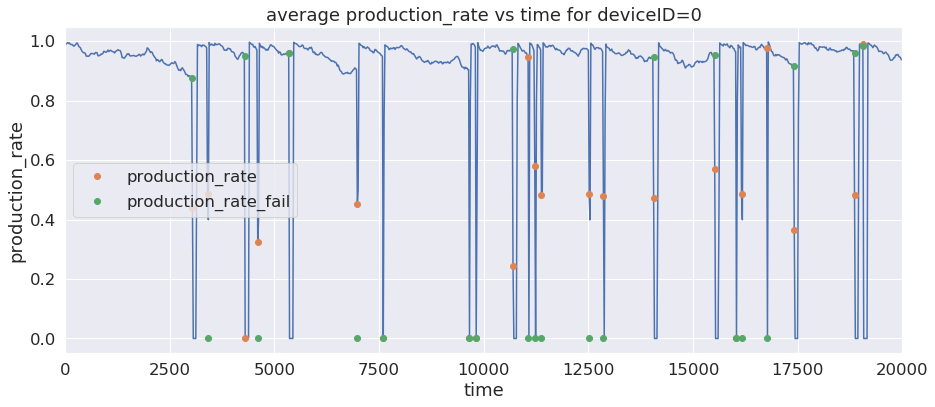

In [11]:
#plot production_rate vs time for deviceID=0
deviceID = 0
df = records
df = df[df.deviceID == deviceID]
xp = df.time
yp = df.production_rate
sns.set(font_scale=1.5, font='DejaVu Sans')
fig, ax = plt.subplots(1,1, figsize=(15, 6))
p = ax.plot(xp, yp, linestyle='-', label='')
df = df[df.issue != 'none']
xp = df.time
yp = df.production_rate
p = ax.plot(xp, yp, linestyle='none', marker='o', label='production_rate')
yp = df.production_rate_fail
p = ax.plot(xp, yp, linestyle='none', marker='o', label='production_rate_fail')
p = ax.set_title('average production_rate vs time for deviceID=' + str(deviceID))
p = ax.set_xlabel('time')
p = ax.set_ylabel('production_rate')
p = ax.set_xlim(0, 20000)
leg = ax.legend()

In [12]:
#get list of deviceIDs
df = records
deviceIDs = df.deviceID.unique().tolist()

In [13]:
#list issues & their frequency
df = records
N = df.groupby('issue')['time'].count().sort_values(ascending=False)
print N
issues = N.index.tolist()
issues.remove('none')
print 'issues = ', issues
N_issues = N[issues].sum()
print 'N_issues = ', N_issues

issue
none             973555
jammed_rotor      19471
cracked_valve      5376
broken_gear        1598
Name: time, dtype: int64
issues =  ['jammed_rotor', 'cracked_valve', 'broken_gear']
N_issues =  26445


[49, 96, 498, 505, 518, 630, 730, 925, 934]


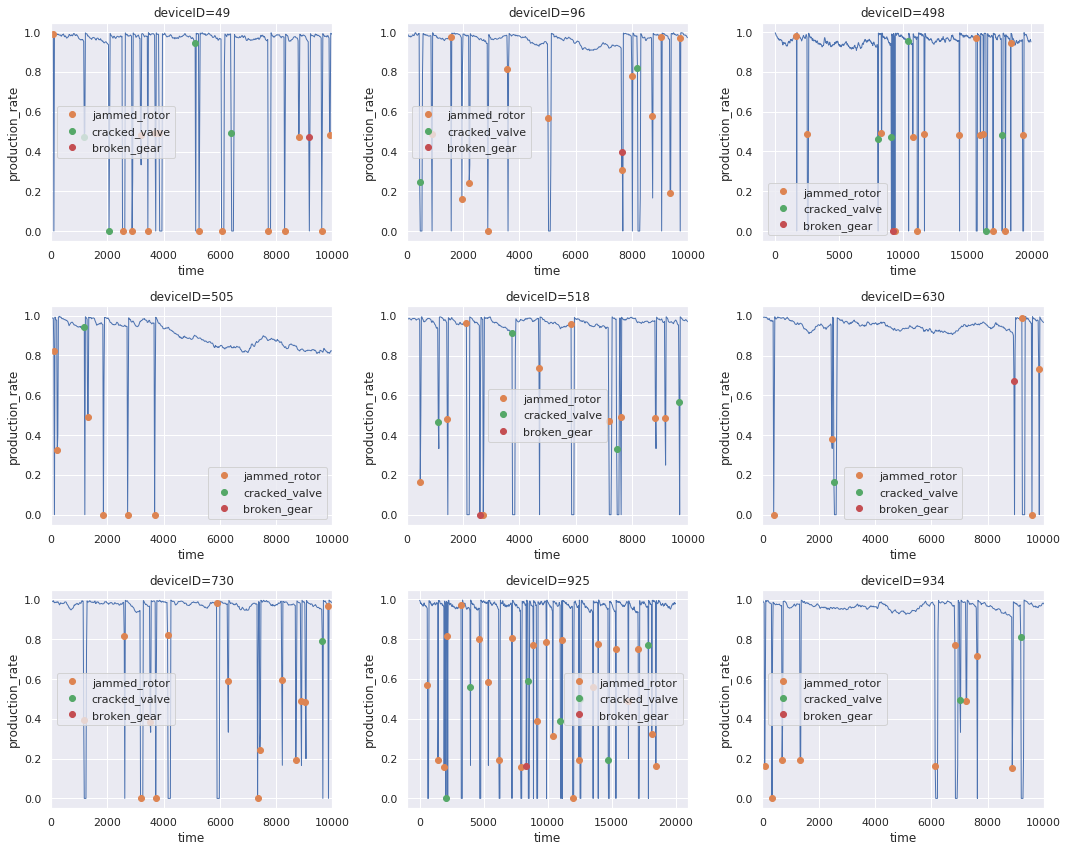

In [14]:
#plot array of production_rates vs time for randomly selected deviceIDs
Nxy = 3
N = Nxy**2
random_deviceIDs = np.sort(np.random.choice(deviceIDs, size=N)).tolist()
print random_deviceIDs
sns.set(font_scale=1.0, font='DejaVu Sans')
f, axes = plt.subplots(Nxy, Nxy, figsize=(15, 12))
axes = axes.reshape(N)
for idx in range(N):
    deviceID = random_deviceIDs[idx]
    df = records
    jdx = (df.deviceID == deviceID)
    df = df[jdx]
    xp = df.time
    yp = df.production_rate
    ax = axes[idx]
    p = ax.plot(xp, yp, linewidth=1, linestyle='-', label='')
    for issue in issues:
        dfs = df[df.issue == issue]
        if (len(dfs) > 0):
            xp = dfs.time
            yp = dfs.production_rate
            p = ax.plot(xp, yp, linestyle='none', marker='o', markersize=6, label=issue)
    p = ax.set_title('deviceID=' + str(deviceID))
    p = ax.set_xlabel('time')
    p = ax.set_ylabel('production_rate')
    if (xp.max() > 10000):
        p = ax.set_xlim(0, 10000)
    leg = ax.legend()
plt.tight_layout()

In [15]:
#compute avg production_rate (aka production efficiency) vs time
production_rate_avg = records.groupby('time')['production_rate'].mean()
idx = production_rate_avg.index > production_rate_avg.index.values.mean()
mean_production_rate_avg = production_rate_avg[idx].mean()
print 'mean_production_rate_avg = ', mean_production_rate_avg
idx = records.production_rate > 0.5
pr = records[idx].production_rate.mean()
print 'pr = ', pr
max_production_rate = pr - (N_issues*repair_duration)*1.0/(N_devices*N_timesteps)
print 'max_production_rate = ', max_production_rate

mean_production_rate_avg =  0.8911660275
pr =  0.958086314663
max_production_rate =  0.8258613146633754


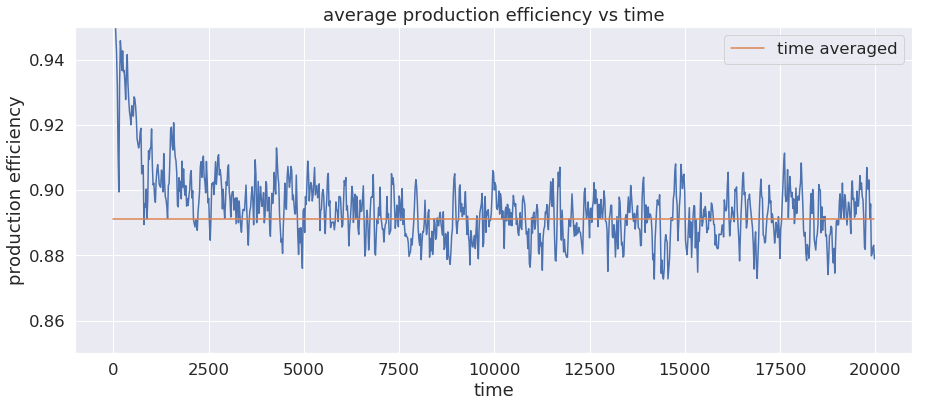

In [16]:
#plot avg production_rate vs time
sns.set(font_scale=1.5, font='DejaVu Sans')
fig, ax = plt.subplots(1,1, figsize=(15, 6))
yp = production_rate_avg
p = ax.plot(yp, linestyle='-', label = '')
yp = yp*0 + mean_production_rate_avg
p = ax.plot(yp, linestyle='-', label = 'time averaged')
p = ax.set_title('average production efficiency vs time')
p = ax.set_xlabel('time')
p = ax.set_ylabel('production efficiency')
p = ax.set_ylim(0.85, 0.95)
p = ax.legend()
plt.savefig('figs/pdm_avg_production.png')

In [17]:
#fraction of technicians utilized
df = telemetry
technician_fraction = df[df.sensor == 'N_technicians'][['time', 'value']]
technician_fraction['technician_fraction'] = technician_fraction.value/N_technicians
idx = (technician_fraction.time > N_timesteps/2)
technician_fraction_mean = technician_fraction[idx].technician_fraction.mean()
technician_fraction_std = technician_fraction[idx].technician_fraction.std()
print 'technician_fraction_mean = ', technician_fraction_mean
print 'technician_fraction_std = ', technician_fraction_std
technician_fraction.tail()

technician_fraction_mean =  0.733403340334
technician_fraction_std =  0.08178096391


,time,value,technician_fraction
11006865,19995,90.0,0.90
11007436,19996,80.0,0.80
11007985,19997,81.0,0.81
11007990,19998,81.0,0.81
11008609,19999,80.0,0.80


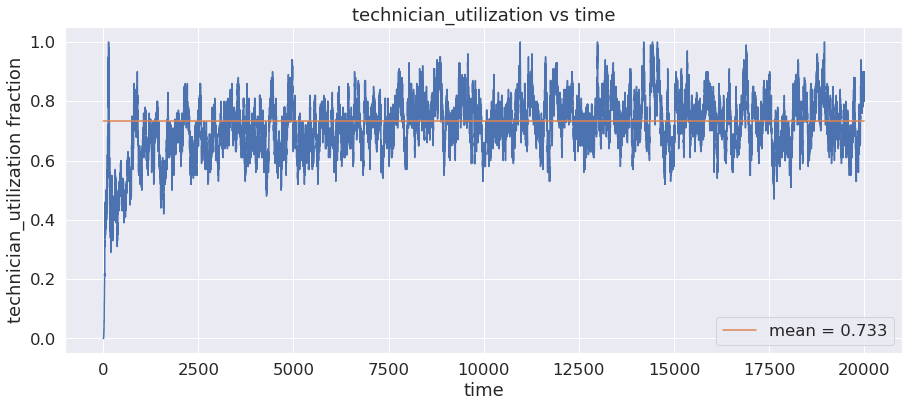

In [18]:
#plot technician_utilization vs time
xp = technician_fraction.time
yp = technician_fraction.technician_fraction
sns.set(font_scale=1.5, font='DejaVu Sans')
fig, ax = plt.subplots(1,1, figsize=(15, 6))
p = ax.plot(xp, yp, linestyle='-', label='')
yp = yp*0 + technician_fraction_mean
p = ax.plot(xp, yp, linestyle='-', label='mean = ' + str(technician_fraction_mean)[0:5])
p = ax.set_title('technician_utilization vs time')
p = ax.set_xlabel('time')
p = ax.set_ylabel('technician_utilization fraction')
#p = ax.set_ylim(0.7, 1.02)
p = ax.legend()

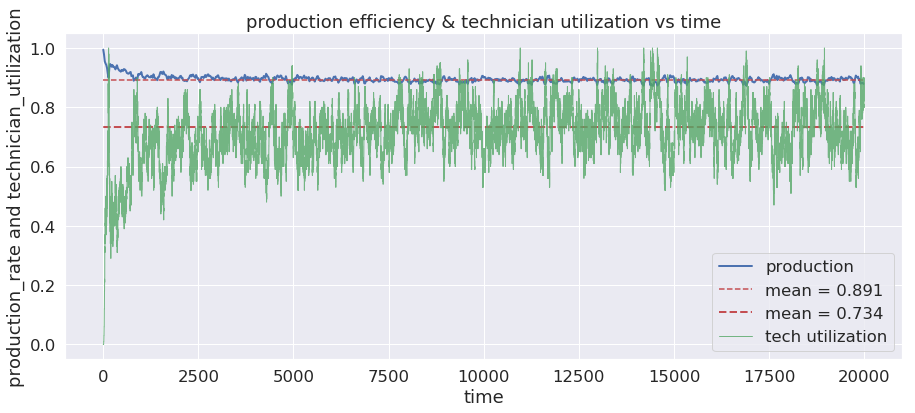

In [19]:
#plot avg production_rate & technician_fraction vs time
sns.set(font_scale=1.5, font='DejaVu Sans')
fig, ax = plt.subplots(1,1, figsize=(15, 6))
yp = production_rate_avg
p = ax.plot(yp, linestyle='-', alpha=1, linewidth=2, label = 'production', color="#4c72b0")
yp = yp*0 + mean_production_rate_avg
p = ax.plot(yp, linestyle='dashed', label = 'mean = 0.891', color="#c44e52")
xp = technician_fraction.time
yp = xp*0 + technician_fraction_mean
p = ax.plot(xp, yp, linestyle='dashed', alpha=1, linewidth=2, label='mean = 0.734', color="#c44e52")
xp = technician_fraction.time
yp = technician_fraction.technician_fraction
p = ax.plot(xp, yp, linestyle='-', alpha=0.8, linewidth=1, label='tech utilization', color="#55a868")
p = ax.set_title('production efficiency & technician utilization vs time')
p = ax.set_xlabel('time')
p = ax.set_ylabel('production_rate and technician_utilization')
p = ax.legend(loc='lower right')
plt.savefig('figs/pdm_production_utilization.png')

In [20]:
#device utilization fraction
df = telemetry
print df.sensor.unique()
operating_fraction = df[df.sensor == 'N_operating'][['time', 'value']]
operating_fraction['device_fraction'] = operating_fraction.value/N_devices
failed_fraction = df[df.sensor == 'N_failed'][['time', 'value']]
failed_fraction['device_fraction'] = failed_fraction.value/N_devices
repair_fraction = df[df.sensor == 'N_repair'][['time', 'value']]
repair_fraction['device_fraction'] = repair_fraction.value/N_devices
maintenance_fraction = df[df.sensor == 'N_maintenance'][['time', 'value']]
maintenance_fraction['device_fraction'] = maintenance_fraction.value/N_devices
maintenance_fraction.tail()

['N_technicians' 'N_operating' 'N_failed' 'N_repair' 'N_maintenance'
 'temperature' 'production_rate' 'pressure' 'load']


,time,value,device_fraction
11006869,19995,35.0,0.035
11007440,19996,24.0,0.024
11007989,19997,24.0,0.024
11007994,19998,24.0,0.024
11008613,19999,24.0,0.024


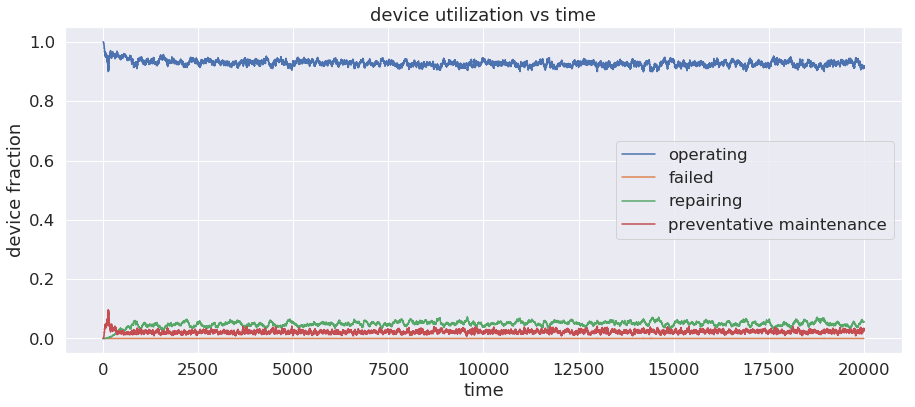

In [21]:
#plot operating_fraction vs time
sns.set(font_scale=1.5, font='DejaVu Sans')
fig, ax = plt.subplots(1,1, figsize=(15, 6))
xp = operating_fraction.time
yp = operating_fraction.device_fraction
p = ax.plot(xp, yp, linestyle='-', label='operating')
xp = failed_fraction.time
yp = failed_fraction.device_fraction
p = ax.plot(xp, yp, linestyle='-', label='failed')
xp = repair_fraction.time
yp = repair_fraction.device_fraction
p = ax.plot(xp, yp, linestyle='-', label='repairing')
xp = maintenance_fraction.time
yp = maintenance_fraction.device_fraction
p = ax.plot(xp, yp, linestyle='-', label='preventative maintenance')
p = ax.set_title('device utilization vs time')
p = ax.set_xlabel('time')
p = ax.set_ylabel('device fraction')
p = ax.legend()

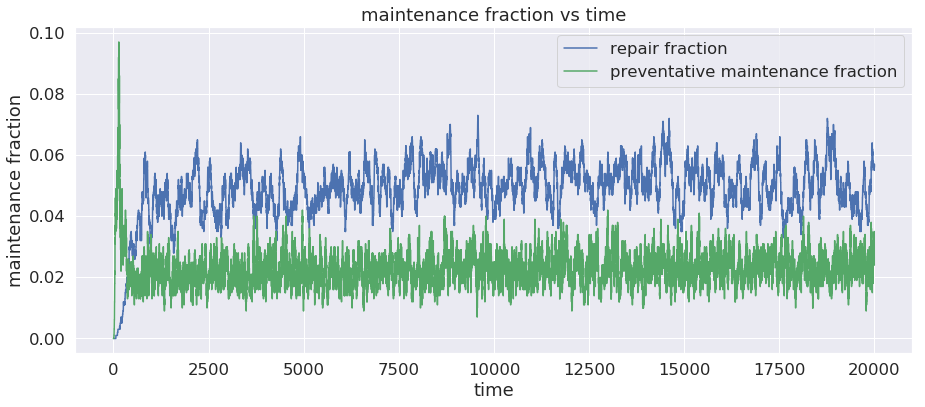

In [22]:
#plot maintenance_fraction vs time
sns.set(font_scale=1.5, font='DejaVu Sans')
fig, ax = plt.subplots(1,1, figsize=(15, 6))
xp = repair_fraction.time
yp = repair_fraction.device_fraction
p = ax.plot(xp, yp, linestyle='-', label='repair fraction')
xp = maintenance_fraction.time
yp = maintenance_fraction.device_fraction
p = ax.plot(xp, yp, linestyle='-', label='preventative maintenance fraction', color="#55a868")
p = ax.set_title('maintenance fraction vs time')
p = ax.set_xlabel('time')
p = ax.set_ylabel('maintenance fraction')
p = ax.legend()
plt.savefig('figs/pdm_maintenance_fraction.png')